In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
# 신경망 구조와 가중치 정보를 저장하고 있는 파일(모델을) 로드
cnn =  tf.keras.models.load_model('mycnn.h5')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [3]:
(x_train,y_train),(x_target, y_target) =  cifar10.load_data()
x_train = x_train/255.0 ; x_target = x_target / 255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_target = tf.keras.utils.to_categorical(y_target,10)

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
res = cnn.evaluate(x_target,y_target)
res[1]*100

313/313 [==============================] - 9s 26ms/step - loss: 0.7085 - accuracy: 0.7905


79.04999852180481

In [13]:
layer = cnn.layers[0]
print(layer.name)
kernel, biases =  layer.get_weights()
kernel.shape

conv2d


(3, 3, 3, 32)

In [15]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel, biases = layer.get_weights()
    print(layer.name, kernel.shape)
  

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [17]:
# 0번째 층의 커널 정보를 저장 맨 앞의 컨볼류션 층의 커널 정보를 추출
kernel, biases =  cnn.layers[0].get_weights()
minv, maxv = kernel.min(), kernel.max()
kernel =  (kernel-minv)/(maxv-minv)
n_kernel = 32

In [20]:
kernel.shape
kernel[:,:,:,0]

array([[[0.51712847, 0.7420152 , 0.516729  ],
        [0.5510826 , 0.48150638, 0.6126784 ],
        [0.3281828 , 0.62694573, 0.3335909 ]],

       [[0.40059432, 0.7726968 , 0.78958523],
        [0.21238628, 0.27714467, 0.21911502],
        [0.4973244 , 0.7419949 , 0.674093  ]],

       [[0.43790329, 0.41896752, 0.606875  ],
        [0.65061146, 0.3946439 , 0.7515249 ],
        [0.7494046 , 0.5905159 , 0.51305723]]], dtype=float32)

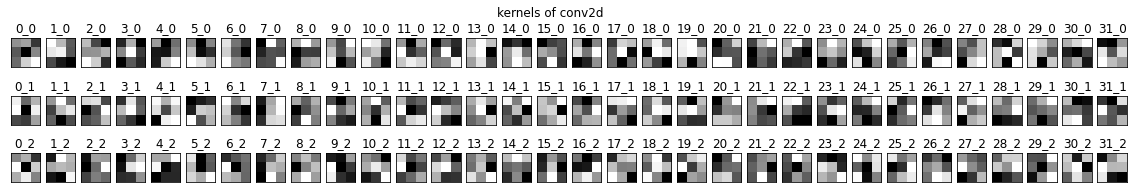

In [22]:
# 맨앞의 컨볼류션층의 커널 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.suptitle("kernels of conv2d")
for i in range(n_kernel):
  f = kernel[:,:,:,i]
  for j in range(3):
    plt.subplot(3,n_kernel,j*n_kernel+i+1)
    plt.imshow(f[:,:,j], cmap='gray')
    plt.xticks([]);plt.yticks([]);
    plt.title(str(i)+'_'+str(j))
plt.show()    


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


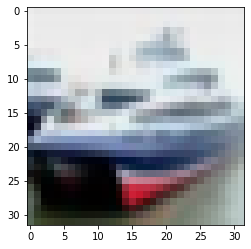

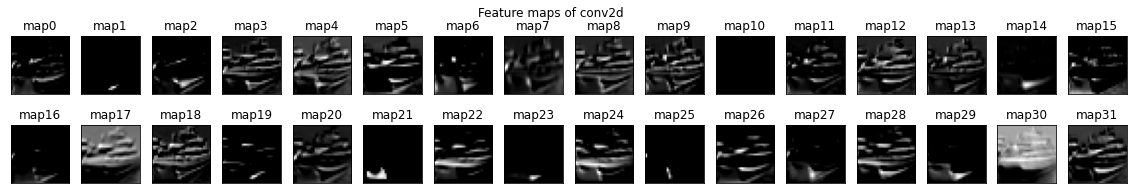

In [25]:
from tensorflow.keras.models import Model
partial_model = Model(inputs = cnn.inputs, outputs = cnn.layers[0].output) #0번층만 떼어냄
partial_model.summary()

feature_map =  partial_model.predict(x_target)
fm = feature_map[1]  # 1번 영상에 대한 특징 맵을 시각화
plt.imshow(x_target[1])

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d")
for i in range(32):
  plt.subplot(2,16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([]); plt.yticks([])
  plt.title("map"+str(i))
plt.show()  
